In [306]:
import pandas as pd
df = pd.read_csv('/kaggle/input/san-francisco-employee-salary-compensation/Employee_Salary_Compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [307]:
df.shape

(678524, 22)

In [308]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

Not many null values . So left them

In [309]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 179
Union                      179
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678524 entries, 0 to 678523
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  678524 non-null  int64  
 1   Job Family Code          678524 non-null  object 
 2   Job Code                 678524 non-null  object 
 3   Year Type                678524 non-null  object 
 4   Year                     678524 non-null  int64  
 5   Organization Group       678524 non-null  object 
 6   Department Code          678522 non-null  object 
 7   Department               678522 non-null  object 
 8   Union Code               678345 non-null  float64
 9   Union                    678345 non-null  object 
 10  Job Family               678524 non-null  object 
 11  Job                      678519 non-null  object 
 12  Employee Identifier      678524 non-null  int64  
 13  Salaries                 678524 non-null  float64
 14  Over

In [311]:
def convert(x):
    x = x.lower()
    x = x.strip()
    return x

In [312]:
df['Job Family Code'] = df['Job Family Code'].apply(convert)
df['Job Code'] = df['Job Code'].apply(convert)
df['Year Type'] = df['Year Type'].apply(convert)
df['Job Family'] = df['Job Family'].apply(convert)

In [313]:
df['Union Code'] = df['Union Code'].fillna(df['Union Code'].mode()[0])
df['Job'] = df['Job'].fillna(df['Job'].mode()[0])
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Department Code'] = df['Department Code'].fillna(df['Department Code'].mode()[0])

**All the null values are replaced for object types with their mode value for best predecition**

In [314]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              0
Department                   0
Union Code                   0
Union                      179
Job Family                   0
Job                          0
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [315]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


**----------------------------------------------**

**1. Salary analysis by department,job family, year**

**----------------------------------------------**

**Analysis of Total Salary by Department**

In [316]:
df['Department'] = df['Department'].str.lower()
df['Department'] = df['Department'].str.strip()
df['Department Code'] = df['Department Code'].str.lower()
df['Department Code'] = df['Department Code'].str.strip()

In [317]:
print(len(df['Department Code'].unique()) , len(df['Department'].unique()))

60 108


In [318]:
salary_by_department = df.groupby('Department')['Total Salary'].mean().sort_values(ascending=False)
pd.DataFrame(salary_by_department.head())

,Total Salary
Department,
law library,162770.802500
city attorney,144588.487050
fire department,142826.919294
fir fire department,142240.134871
sheriff,129562.048436


Text(0, 0.5, 'Salary ($)')

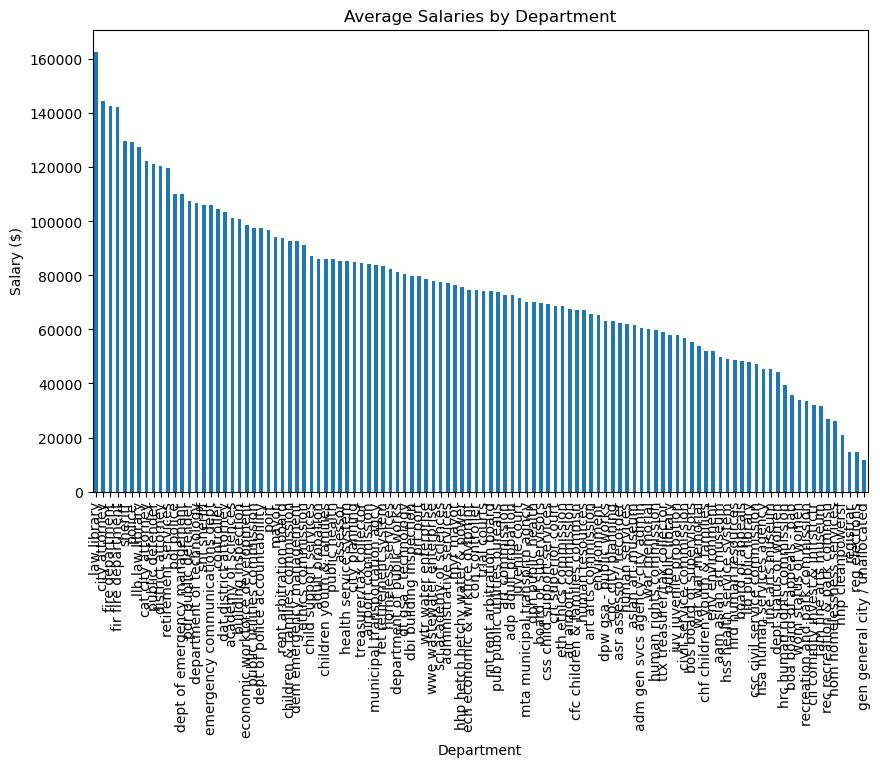

In [319]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
salary_by_department.plot(kind='bar')
plt.title('Average Salaries by Department')
plt.xlabel('Department')
plt.ylabel('Salary ($)')

**Analysis by Department Code**

In [320]:
salary_by_department_code = df.groupby('Department Code')['Total Salary'].mean().sort_values(ascending = False)
pd.DataFrame(salary_by_department_code).head()

,Total Salary
Department Code,
llb,144122.217353
fir,142552.876339
cat,133241.515633
pol,119582.211678
shf,117998.065680


Text(0, 0.5, 'Salary ($)')

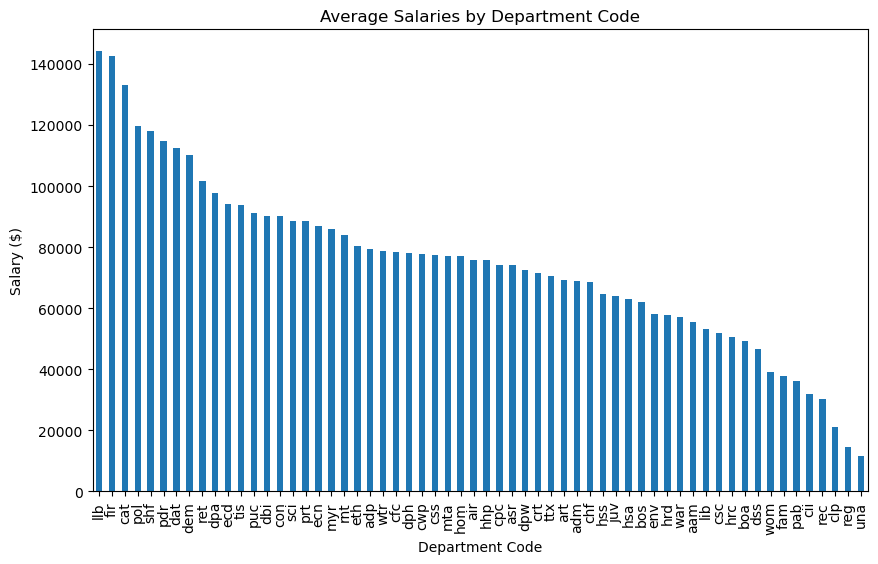

In [321]:
plt.figure(figsize=(10, 6))
salary_by_department_code.plot(kind='bar')
plt.title('Average Salaries by Department Code')
plt.xlabel('Department Code')
plt.ylabel('Salary ($)')

**Analysis by Job Family**

In [322]:
salary_by_job_family = df.groupby('Job Family')['Total Salary'].mean().sort_values(ascending=False)
pd.DataFrame(salary_by_job_family).head()

,Total Salary
Job Family,
administrative & mgmt (unrep),250272.775269
unassigned,154961.578571
fire services,144436.584976
administrative-labor & trades,135589.014858
police services,130925.354525


Text(0, 0.5, 'Salary ($)')

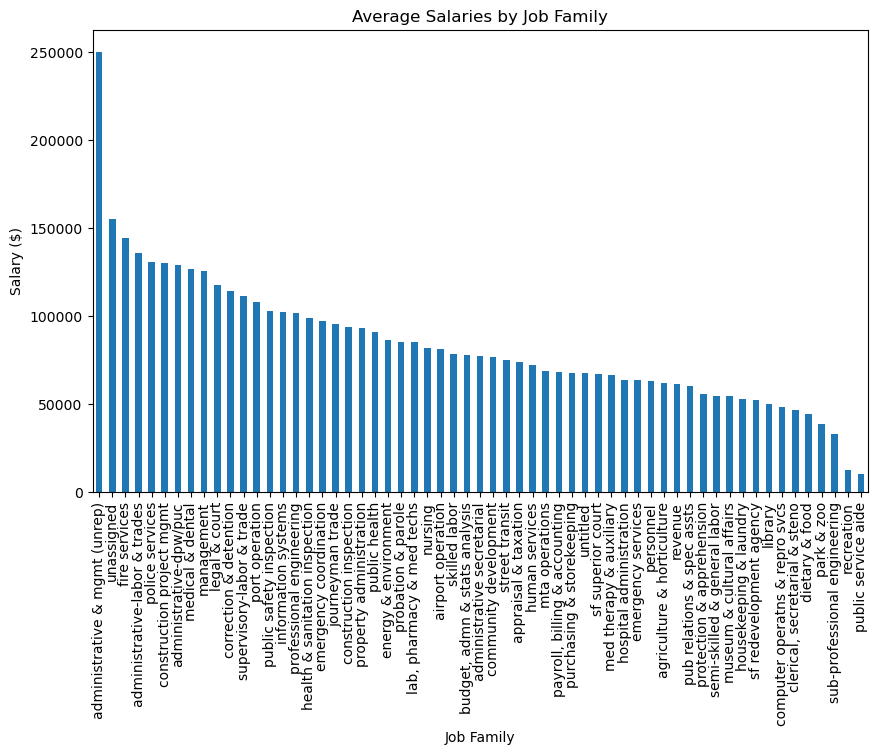

In [323]:

plt.figure(figsize=(10, 6))
salary_by_job_family.plot(kind='bar')
plt.title('Average Salaries by Job Family')
plt.xlabel('Job Family')
plt.ylabel('Salary ($)')

**Analysis by Year**

In [324]:
salary_by_year = df.groupby('Year')['Total Salary'].mean()
pd.DataFrame(salary_by_year)

,Total Salary
Year,
2013,72023.350326
2014,70218.111979
2015,70920.055925
2016,74309.361928
2017,82805.335110
2018,85970.822735
2019,86788.806866
2020,95380.094185


Text(0, 0.5, 'Salary ($)')

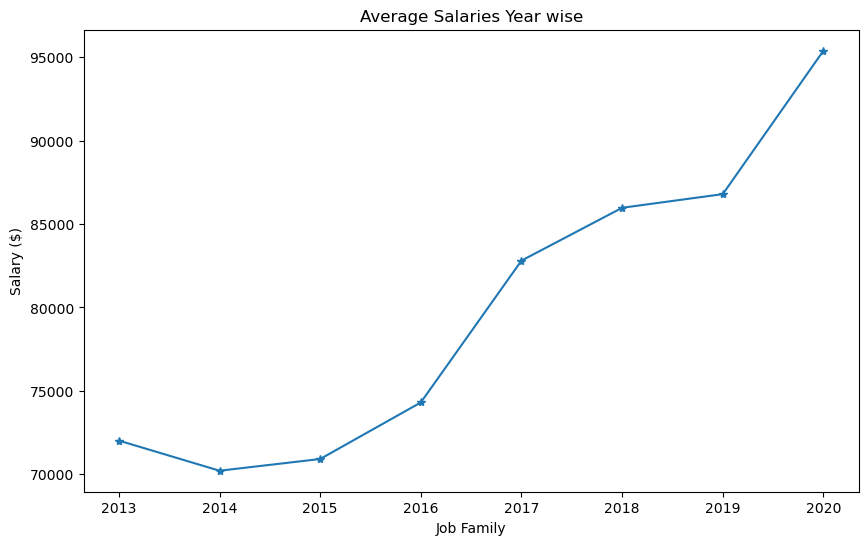

In [325]:
plt.figure(figsize=(10, 6))
salary_by_year.plot(kind='line',marker = '*')
plt.title('Average Salaries Year wise')
plt.xlabel('Job Family')
plt.ylabel('Salary ($)')

**Conclusion:**
1. Law Library, City attorney and Fire Department has highest average salary in order according to the department wise analysis
2. Administrative & mgmt (unrep), unassigned ,fire services are having high average salary by job_family wise analysis
3. Slight decrement in average salaries from 2013 to 2014 but after that they increased continously

**----------------------------------------------**

**2. Benefits Analysis for Overall Compensation**

In [326]:
df_b = pd.concat([df['Retirement'],df['Health and Dental'],df['Other Benefits'],df['Total Compensation']], axis = 1)
df_b.head()

,Retirement,Health and Dental,Other Benefits,Total Compensation
0,11253.16,11961.34,4532.63,85281.78
1,10284.88,7176.80,4755.14,79895.32
2,12495.83,12918.24,4702.71,93649.71
3,19644.45,12918.24,7458.76,134237.37
4,1083.90,956.91,387.50,7512.31


Finding the correlation to understand contibution of benefits

In [327]:
df_b.corr()

,Retirement,Health and Dental,Other Benefits,Total Compensation
Retirement,1.000000,0.779367,0.675334,0.951269
Health and Dental,0.779367,1.000000,0.630131,0.793772
Other Benefits,0.675334,0.630131,1.000000,0.701674
Total Compensation,0.951269,0.793772,0.701674,1.000000


**Conclusion:**

1.We can clearly observe that Retirement have high correlation with Total Compensation(0.951)

2.So we can say Retirement benefits contribution is more followed by (Health and Dental) and Other Benefits

**----------------------------------------------**

**3. Total Compensation Analysis**

Exploring the factors that contribute to the total compensation of employees, including salaries, overtime, other salaries, and benefits.

In [328]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,calendar,2013,Public Protection,adp,adp adult probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,calendar,2013,Public Protection,adp,adp adult probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,calendar,2013,Public Protection,adp,adp adult probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,calendar,2013,Public Protection,adp,adp adult probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,calendar,2013,Public Protection,adp,adp adult probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [329]:
df_c = pd.concat([df['Salaries'],df['Overtime'],df['Other Salaries'],df['Total Benefits'],df['Total Compensation']], axis = 1)
df_c.head()

,Salaries,Overtime,Other Salaries,Total Benefits,Total Compensation
0,57534.65,0.0,0.00,27747.13,85281.78
1,57678.50,0.0,0.00,22216.82,79895.32
2,63532.93,0.0,0.00,30116.78,93649.71
3,101274.51,0.0,-7058.59,40021.45,134237.37
4,5084.00,0.0,0.00,2428.31,7512.31


In [330]:
df_c.describe()

,Salaries,Overtime,Other Salaries,Total Benefits,Total Compensation
count,678524.000000,678524.000000,678524.000000,678524.000000,678524.000000
mean,70626.560805,5592.672838,3869.976380,29290.924481,109159.269539
std,48190.977875,13324.789874,8631.413917,18202.223207,73062.782901
min,-68771.780000,-12308.660000,-19131.100000,-21295.150000,-74082.610000
25%,30502.342500,0.000000,0.000000,12486.985000,46834.075000
50%,68942.825000,0.000000,720.000000,33102.795000,109394.735000
75%,101887.527500,4429.512500,4399.657500,41566.422500,156607.520000
max,651936.710000,321523.310000,568163.120000,166068.180000,807625.250000


**1. We can observe that Salaries + Overtime + Other Salaries + Total Benefits = Total Compensation**

**2. We are having negative values and zero values for Salaries, Overtime , Other Salaries, Total Benefits**

In [331]:
print('Negative Salaries Count = ',len(df[df['Salaries']<0]))
print('Negative Overtime Count = ',len(df[df['Overtime']<0]))
print('Negative Other Salaries Count = ',len(df[df['Other Salaries']<0]))
print('Negative Total Benefits Count = ',len(df[df['Total Benefits']<0]))

Negative Salaries Count =  130
Negative Overtime Count =  49
Negative Other Salaries Count =  108
Negative Total Benefits Count =  499


In [332]:
print('Zero Salaries Count = ',len(df[df['Salaries']==0]))
print('Zero Overtime Count = ',len(df[df['Overtime']==0]))
print('Zero Other Salaries Count = ',len(df[df['Other Salaries']==0]))
print('Zero Total Benefits Count = ',len(df[df['Total Benefits']==0]))

Zero Salaries Count =  11278
Zero Overtime Count =  358547
Zero Other Salaries Count =  219088
Zero Total Benefits Count =  623


**Conclusion:**

Thus the Total Compensation Values are positive , negative as well as zero due to values of factors **Salaries, Overtime, Other Salaries, Benefits**

**----------------------------------------------**

**4. Organisational Group Analysis**

Investigating the variations in compensation across different organizational groups to understand how compensation differs based on the nature of work.

In [333]:
df.columns

Index(['Organization Group Code', 'Job Family Code', 'Job Code', 'Year Type',
       'Year', 'Organization Group', 'Department Code', 'Department',
       'Union Code', 'Union', 'Job Family', 'Job', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')

In [334]:
len(df['Organization Group'].unique())

7

In [335]:
df['Organization Group'].value_counts()

Public Works, Transportation & Commerce     214276
Community Health                            149768
Public Protection                           130170
General Administration & Finance             61992
Culture & Recreation                         61240
Human Welfare & Neighborhood Development     60685
General City Responsibilities                  393
Name: Organization Group, dtype: int64

In [336]:
compensation_by_organisation = df.groupby('Organization Group')['Total Compensation'].mean().sort_values(ascending=False)
pd.DataFrame(compensation_by_organisation)

,Total Compensation
Organization Group,
Public Protection,152847.613476
"Public Works, Transportation & Commerce",110335.157055
Community Health,106296.832312
General Administration & Finance,103844.990275
Human Welfare & Neighborhood Development,79091.183202
Culture & Recreation,54952.370482
General City Responsibilities,16488.564631


Text(0, 0.5, 'Compensation avg ($)')

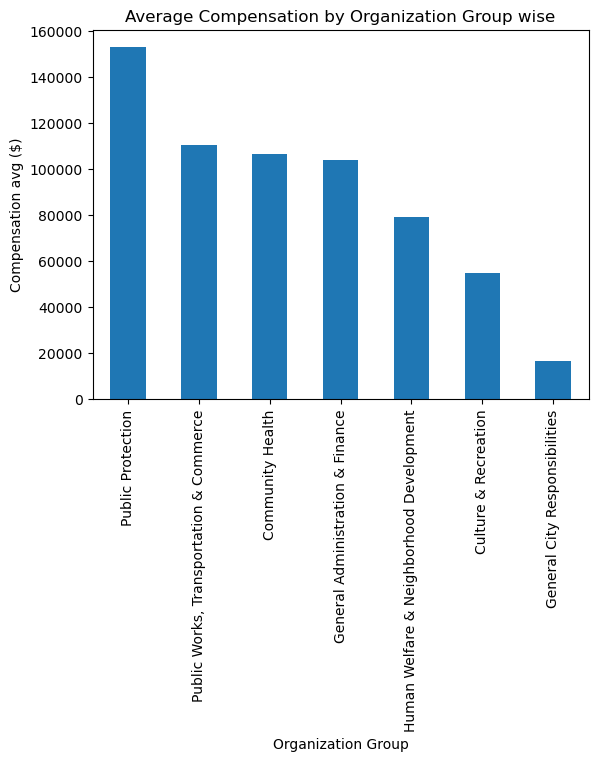

In [337]:
compensation_by_organisation.plot(kind='bar')
plt.title('Average Compensation by Organization Group wise')
plt.xlabel('Organization Group')
plt.ylabel('Compensation avg ($)')

**Conclusion:**

**The Public Protection organization employees recieved high compensation followed by Public Works,Transporattion, Commerce**

**----------------------------------------------**

**5. Yearly Trends:** 

Observing the changes in salary and compensation patterns over the years to identify any significant shifts or anomalies.


**----------------------------------------------**

In [339]:

salary_by_year = df.groupby("Year")["Total Salary"].mean()
comp_by_year = df.groupby("Year")["Total Compensation"].mean()


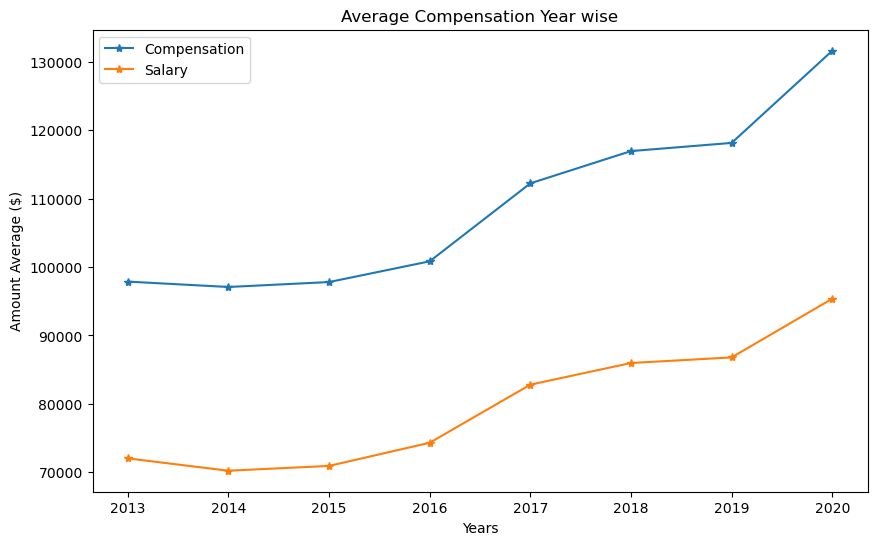

In [340]:
plt.figure(figsize = (10,6))
comp_by_year.plot(kind='line',marker = '*', label = 'Compensation')
salary_by_year.plot(kind='line',marker = '*', label = 'Salary')
plt.title('Average Compensation Year wise')
plt.xlabel('Years')
plt.ylabel('Amount Average ($)')
plt.legend()
plt.show()

**Conclusion:**

Both the salary and compensation were increeased as the year proceeds

**----------------------------------------------**

**6. Union Analysis:** 

Assessing the impact of union representation on salary and benefits, comparing unionized and non-unionized positions.

In [341]:
len(df['Union'].unique())

129

In [342]:
df['Union'] = df['Union'].str.lower()
df['Union'] = df['Union'].str.strip()

In [343]:
len(df['Union'].unique())

128

In [344]:
df['Union'].unique()

array(['prof & tech engineers - miscellaneous, local 21',
       'prof & tech engineers - personnel, local 21',
       'municipal executive association - miscellaneous',
       "deputy probation officers' association",
       'seiu - miscellaneous, local 1021',
       'operating engineers - sup probation ofcrs, local 3',
       'prof & tech engineers - court employees, local 21',
       'prof & tech engineers - court attorneys, local 21',
       'court interpreters, local 39521',
       'court unrepresented professionals',
       'court unrepresented managers',
       'prof & tech engineers - court reporters, local 21',
       'municipal executive association - court',
       'seiu - court employees, local 1021',
       'court unrepresented bench officers',
       'management unrepresented employees',
       "municipal attorneys' association",
       "district attorney investigators' association",
       'elected officials', 'miscellaneous unrepresented employees',
       'physicians a

In [345]:
salary_by_union = df.groupby('Union')['Total Salary'].mean().sort_values(ascending = False)
pd.DataFrame(salary_by_union).head()

,Total Salary
Union,
unrepresented contract rte fbp,332080.805000
management unrepresented employees - mta,302650.025000
municipal executive association - police,302541.463333
indv. employment contract-mta,285532.422222
"municipal exec assoc, police",280622.170965


In [346]:
benefit_by_union = df.groupby('Union')['Total Benefits'].mean().sort_values(ascending = False)
pd.DataFrame(benefit_by_union).head()

,Total Benefits
Union,
unrepresented contract rte fbp,96188.791250
management unrepresented employees - mta,93455.238750
indv. employment contract-mta,79066.208889
"municipal exec assoc, police",75830.340000
"physician/dentists 11-aa, uapd",74236.745562


Text(0, 0.5, 'Salary ($)')

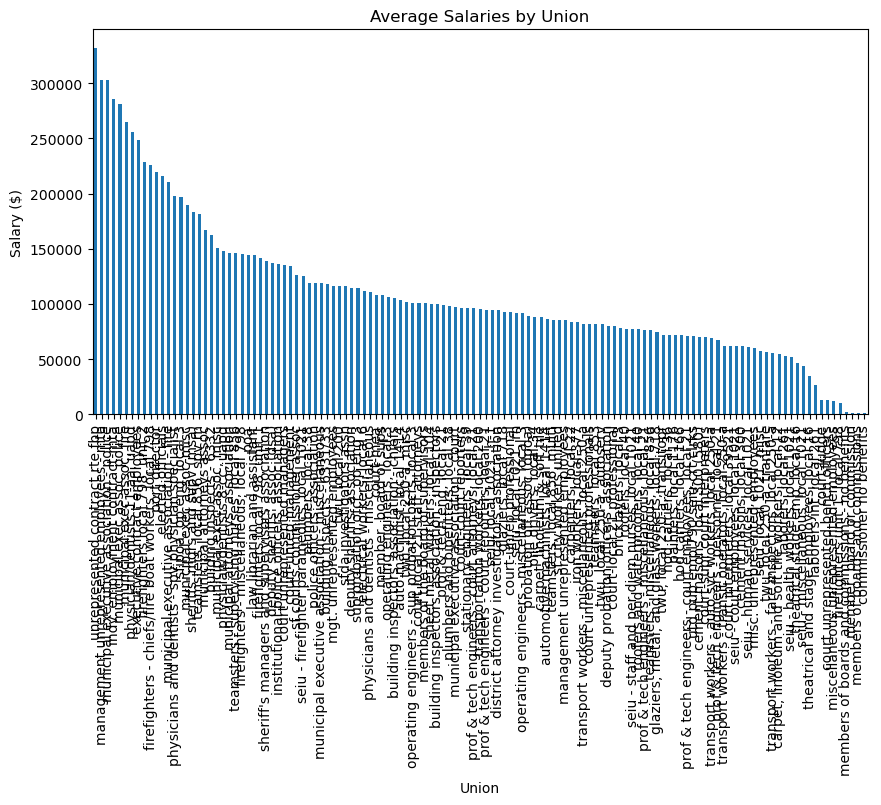

In [347]:
plt.figure(figsize=(10, 5))
salary_by_union.plot(kind='bar')
plt.title('Average Salaries by Union')
plt.xlabel('Union')
plt.ylabel('Salary ($)')

Text(0, 0.5, 'Benefits ($)')

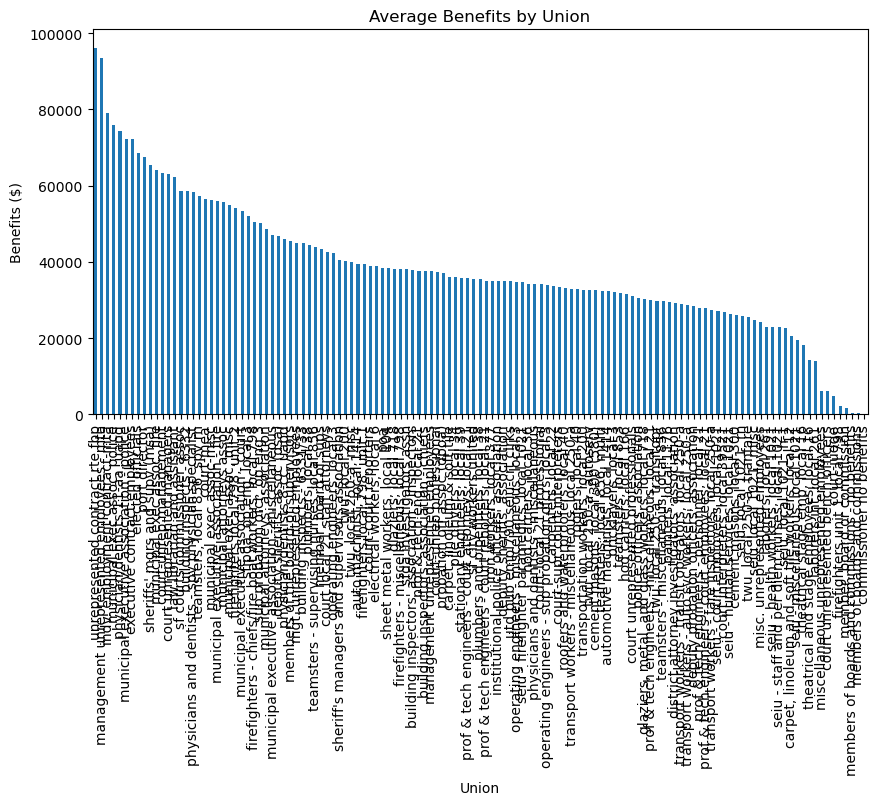

In [348]:
plt.figure(figsize=(10, 5))
benefit_by_union.plot(kind='bar')
plt.title('Average Benefits by Union')
plt.xlabel('Union')
plt.ylabel('Benefits ($)')

*Unionized and NON- Unionized Analysis*

**Union as NULL Values are considered as non-unionised category**

In [349]:
non_unionised = df[df['Union'].isnull()]
unionised = df[df['Union'].notnull()]

In [350]:
print('Non - Unionised avg Salary = ',non_unionised['Total Salary'].mean(),'\n','Non - Unionised avg Benefits = ',non_unionised['Total Benefits'].mean())

Non - Unionised avg Salary =  14408.221675977655 
 Non - Unionised avg Benefits =  6219.160502793296


In [351]:
print('Unionised avg Salary = ',unionised['Total Salary'].mean(),'\n','Unionised avg Benefits = ',unionised['Total Benefits'].mean())

Unionised avg Salary =  79885.6185140157 
 Unionised avg Benefits =  29297.01260065306


**Conclusion:**

**We can clearly check the huge difference between Benefits and Salaries of non-unionised and unionised employees**

1. Non Unionised employees are getting lesser salaries and benefits compared to unionised employees

**----------------------------------------------**

**7. Total Compensation Prediction**

In [352]:
df1 = df
df1.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,calendar,2013,Public Protection,adp,adp adult probation,21.0,"prof & tech engineers - miscellaneous, local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,calendar,2013,Public Protection,adp,adp adult probation,21.0,"prof & tech engineers - miscellaneous, local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,calendar,2013,Public Protection,adp,adp adult probation,21.0,"prof & tech engineers - miscellaneous, local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,calendar,2013,Public Protection,adp,adp adult probation,21.0,"prof & tech engineers - miscellaneous, local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,calendar,2013,Public Protection,adp,adp adult probation,21.0,"prof & tech engineers - miscellaneous, local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [353]:
df1['Union'] = df1['Union'].fillna(df1['Union'].mode()[0])

In [354]:
df1.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [355]:
#Dropping because they have similar features in column.
df1.drop(['Organization Group Code','Job Family Code','Job Code','Department Code','Union Code','Total Salary','Total Benefits'],inplace=True,axis=1)

In [356]:
index_names = df1[(df1['Salaries']<0) |  (df1['Overtime']<0) | (df1['Other Salaries']<0) | (df1['Retirement']<0) | (df1['Health and Dental']<0) | (df1['Other Benefits']<0) | (df1['Total Compensation']<0)].index

In [357]:
df1.drop(index=index_names,inplace=True)

In [358]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
for i in df1:
    if df1[i].dtype=='object':
        df1[i] = le.fit_transform(df1[i])
    else:
        continue

In [359]:
X = df1.drop('Total Compensation',axis=1)
y = df1['Total Compensation']

In [360]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [361]:
model.fit(X_train,y_train)

LinearRegression()

In [362]:
prediction = model.predict(X_test)

In [363]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_test,prediction)
r2Score

0.9994393815811299

**Conclusion**

**Predictions are made with r2_score = 0.9994 using Linear Regression**